# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. `Numpy`, `matplotlib`, `scipy.stats`

При возникновении сложностей, связанных с Питоном и библиотеками, посмотрите материалы видео-курса <a href="https://mipt-stats.gitlab.io/courses/python.html">Python для анализа данных</a>. Если не помогло, задайте вопрос по заданию.

**Правила:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Работы, присланные иным способом, не принимаются.
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb. 
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.

**Баллы за задание:**

<font color="blue"><b>Легкая часть</b></font> (достаточно на "хор"):
* Задача 1.1 — 3 балла
* Задача 1.2 — 3 балла
* Задача 2 — 3 балла

<font color="orange"><b>Сложная часть</b></font> (необходимо на "отл"):
* Задача 1.3 — 3 балла
* Задача 3.1 — 3 балла
* Задача 3.2 — 3 балла
* Задача 3.3 — 3 балла
* Задача 4 — 4 балла


In [377]:
import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets

import typing

%matplotlib inline

### <font color="blue"><i>Легкая часть: генерация</i></font>

<font color="red">В этой части другие библиотеки использовать запрещено. Шаблоны кода ниже менять нельзя. </font>

### Задача 1
Имеется симметричная монета. Напишите функцию генерации независимых случайных величин из нормального и экспоненциального распределений с заданными параметрами.

In [12]:
# Эта ячейка -- единственная в задаче 1, в которой нужно использовать
# библиотечную функция для генерации случайных чисел.
# В других ячейках данной задачи используйте функцию coin.

# симметричная монета
coin = sps.rv_discrete(values = ((0, 1), (0.5, 0.5))).rvs 

Проверьте работоспособность функции, сгенерировав 10 бросков симметричной монеты.

In [13]:
coin(size=10)

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0])

**Часть 1.** Напишите сначала функцию генерации случайных величин из равномерного распределения на отрезке $[0, 1]$ с заданной точностью. Это можно сделать, записав случайную величину $\xi \sim U[0, 1]$ в двоичной системе системе счисления $\xi = 0,\xi_1\xi_2\xi_3...$. Тогда $\xi_i \sim Bern(1/2)$ и независимы в совокупности. Приближение заключается в том, что вместо генерации бесконечного количества $\xi_i$ мы полагаем $\xi = 0,\xi_1\xi_2\xi_3...\xi_n$.

Нужно реализовать функцию нужно так, чтобы она могла принимать на вход в качестве параметра `size` как число, так и объект `tuple` любой размерности, и возвращать объект `numpy.array` соответствующей размерности. Например, если `size=(10, 1, 5)`, то функция должна вернуть объект размера $10 \times 1 \times 5$. Кроме того, функцию `coin` можно вызвать только один раз, и, конечно же, не использовать какие-либо циклы. Аргумент `precision` отвечает за число $n$.

In [39]:
def uniform(size=1, precision=30):
    #массив для перевода из двоичной в десятичную
    #как переводить см.: 
    #www.youtube.com/watch?v=F5OkBuzvI5g&ab_channel=Byte%2B%2B
    to_decimal = 2**(-1 - np.arange(precision).astype(float))
    randoms_variables = coin(size = np.append(size, precision))
    
    #Это не в одну строчку, но мне кажется так понятнее :). 
    #Если надо в одну строчку, то можно не опрделять переменные выше, а сразу их вернуть
    return (randoms_variables * to_decimal).sum(axis = -1)

Для $U[0, 1]$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-0.25, 1.25]$, а также гистограмму по сгенерированным случайным величинам.

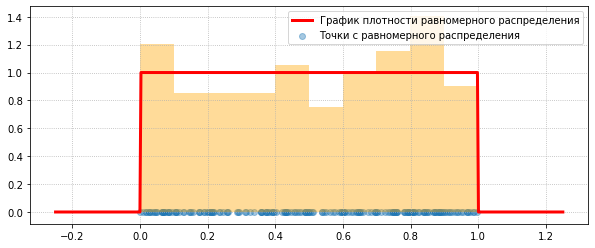

In [43]:
size = 200
grid = np.linspace(-0.25, 1.25, num = 500)
sample = uniform(size = size, precision = 50)

# Отрисовка графика
plt.figure(figsize = (10, 4))

# отображаем значения случайных величин полупрозрачными точками
plt.scatter(
    sample, 
    np.zeros(size), 
    alpha = 0.4, 
    label = 'Точки с равномерного распределения'
)

# по точкам строим нормированную полупрозрачную гистограмму
plt.hist(
    sample, 
    bins = 10, 
    density = True, 
    alpha = 0.4, 
    color = 'orange'
)

# рисуем график плотности
plt.plot(
    grid, 
    sps.uniform.pdf(grid), 
    color = 'red', 
    lw = 3, 
    label = 'График плотности равномерного распределения'
)
plt.legend()
plt.grid(ls=':')
plt.show()

Исследуйте, как меняются значения случайных величин в зависимости от `precision`.

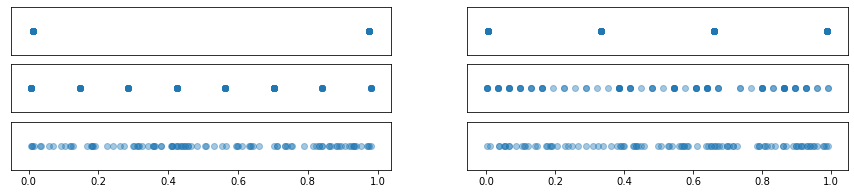

In [47]:
size = 100

plt.figure(figsize = (15, 3))

for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
    plt.subplot(3, 2, i + 1)
    plt.scatter(
        uniform(size = size, precision = precision), 
        np.zeros(size), 
        alpha = 0.4
    )
    #скрыть оси
    plt.yticks([])
    if i < 4: plt.xticks([])

plt.show()

**Вывод:**

Кажется, что модель с монеткой --- довольно хороший способ моделировать равномерное распределение. Также видно, что чем меньше `precision`, тем вообще хуже моделируется равномерное распределение.

**Часть 2.** Напишите функцию генерации случайных величин в количестве `size` штук из распределения $\mathcal{N}(loc, scale^2)$ с помощью преобразования Бокса-Мюллера, которое заключается в следующем. Пусть $\xi$ и $\eta$ — независимые случайные величины, равномерно распределенные на $(0, 1]$. Тогда случайные величины $X = cos(2\pi\xi)\sqrt{-2\ln\eta}, Y = sin(2\pi\xi)\sqrt{-2\ln\eta}$ являются независимыми нормальными $\mathcal{N}(0, 1)$.

Реализация должна быть без циклов. В качестве параметра `size` может быть как число, так и объект `tuple` любой размерности. Желательно использовать как можно меньше бросков монеты. Можно использовать реализованную ранее функцию `uniform`.

In [51]:
def normal(size=1, loc=0, scale=1, precision=30):
    xi = uniform(size = np.prod(size)//2 + 1, precision = precision)
    eta = uniform(size = np.prod(size)//2 + 1, precision = precision)
    temp = np.sqrt(-2 * np.log(eta))*scale 
    
    return np.append(np.cos(2*np.pi*xi)*temp + loc, np.sin(2*np.pi*xi)*temp + loc)[:np.prod(size)].reshape(size)

Для $\mathcal{N}(0, 1)$ сгенерируйте $200$ независимых случайных величин, постройте график плотности на отрезке $[-3, 3]$, а также гистограмму по сгенерированным случайным величинам.

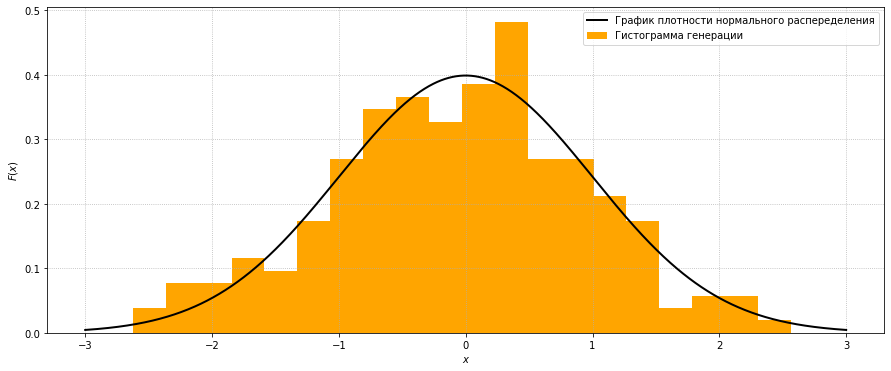

In [106]:
sample = normal(size = 200)
grid = np.linspace(-3, 3, 1000)

plt.figure(figsize = (15,6))
#график
plt.plot(grid,
         sps.norm.pdf(grid),
         color = 'black',
         lw = 2,
         label = 'График плотности нормального распеределения')

#гистограмма
plt.hist(sample,
         bins = 20,
         color = 'orange',
         density = True,
         label = 'Гистограмма генерации')

plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.grid(ls = ':')
plt.legend()
plt.show()

### <font color="orange"><i>Сложная часть: генерация</i></font>

**Часть 3.** Вы уже научились генерировать выборку из равномерного распределения. Напишите функцию генерации выборки из экспоненциального распределения, используя задачу из теории вероятностей:

*Если $\xi$ — случайная величина, имеющая абсолютно непрерывное распределение, и $F$ — ее функция распределения, то случайная величина $F(\xi)$ имеет равномерное распределение на $[0, 1]$*.

Какое преобразование над равномерной случайной величиной необходимо совершить? Поясните ответ.

# Ответ:

Из условия задачи понятно, что нужно просто взять $F^{-1}$ от равномерно распределенной случайной величины, где $F$ --- функция распределения экспоненциально распределенной случайной величины. 

Получится: $$F^{-1}(x) = -\frac{\ln{(1-x)}}{\lambda}$$

Для получения полного балла реализация должна быть без циклов, а параметр `size` может быть типа `tuple`.

In [74]:
def expon(size=1, lambd=1, precision=30):
    return (- np.log(1 - uniform(size = size, precision = precision))/lambd)

Для $Exp(1)$ сгенерируйте выборку размера 100 и постройте график плотности этого распределения на отрезке $[-0.5, 5]$.

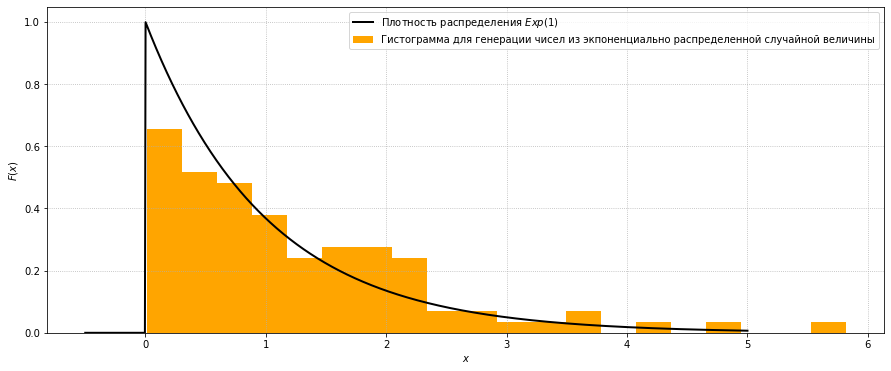

In [105]:
grid = np.linspace(-0.5, 5, 1000)
sample = expon(size = 100)

plt.figure(figsize = (15,6))

plt.hist(sample,
         density = True,
         color = 'orange',
         bins = 20,
         label = 'Гистограмма для генерации чисел из экпоненциально распределенной случайной величины')

plt.plot(grid,
         sps.expon.pdf(grid),
         lw = 2,
         color = 'black',
         label = 'Плотность распределения $Exp(1)$')

plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.grid(ls = ':')
plt.legend()
plt.show()

**Вывод по задаче:**

Из любой равномерно распределенной случайной величины можно получить любую случайную величину, если известна её функция распределения.  

### <font color="blue"><i>Легкая часть: матричное умножение</i></font>

### Задача 2
Напишите функцию, реализующую матричное умножение. При вычислении разрешается создавать объекты размерности три. Запрещается пользоваться функциями, реализующими матричное умножение, например, `numpy.dot`, операция `@`, операция умножения в классе `numpy.matrix`, суммы Эйнштейна и прочие. Разрешено пользоваться только простыми поэлементными векторно-арифметическими операциями над `numpy.array`, любыми операциями изменения формы массива. 

*Авторское решение занимает одну строчку.*

In [101]:
def matrix_multiplication(A, B):    
    C = np.zeros(shape = (A.shape[0], B.shape[1]))
    for i in range(B.shape[1]):
        C[:, i] = (A*B[:, i]).sum(axis = 1)
    return C

Проверьте правильность реализации на случайных матрицах. Должен получится ноль, либо очень малое число в пределах машинной точности.

In [102]:
A = sps.uniform.rvs(size=(10, 20))
B = sps.uniform.rvs(size=(20, 30))
np.abs(matrix_multiplication(A, B) - A @ B).sum()

1.3233858453531866e-13

На основе опыта: вот в таком стиле многие из вас присылали бы нам свои работы, если не стали бы делать это задание :)

In [103]:
def stupid_matrix_multiplication(A, B):
    C = [[0 for j in range(len(B[0]))] for i in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

Проверьте, насколько быстрее работает ваш код по сравнению с неэффективной реализацией `stupid_matrix_multiplication`. Эффективный код на авторском ноутбуке работает почти в 200 раз быстрее. Для примера посмотрите также, насколько быстрее работают встроенные `numpy`-функции.

In [104]:
A = sps.uniform.rvs(size=(400, 200))
B = sps.uniform.rvs(size=(200, 300))

%time C1 = matrix_multiplication(A, B)
%time C2 = A @ B  # python 3.5
%time C3 = np.matrix(A) * np.matrix(B)
%time C4 = stupid_matrix_multiplication(A, B)
%time C5 = np.einsum('ij,jk->ik', A, B) 

Wall time: 34.9 ms
Wall time: 966 µs
Wall time: 997 µs
Wall time: 17.8 s
Wall time: 7 ms


Ниже для примера приведена полная реализация функции. Ваc мы, конечно, не будем требовать проверять входные данные на корректность, но документации к функциям нужно писать.

In [99]:
def matrix_multiplication(A, B):
    '''Возвращает матрицу, которая является результатом
    матричного умножения матриц A и B.
    
    '''
    
    # Если A или B имеют другой тип, нужно выполнить преобразование типов
    A = np.array(A)
    B = np.array(B)
    
    # Проверка данных входных данных на корректность
    assert A.ndim == 2 and B.ndim == 2, 'Размер матриц не равен 2'
    assert A.shape[1] == B.shape[0], \
        ('Матрицы размерностей {} и {} неперемножаемы'.format(A.shape, B.shape))
    
    C = np.zeros(shape = (A.shape[0], B.shape[1]))
    
    for i in range(B.shape[1]):
        C[:, i] = (A*B[:, i]).sum(axis = 1)
    
    return C

### <font color="orange"><i>Сложная часть: броуновское движение</i></font>

### Задача 3

<a target="_blank" href="https://ru.wikipedia.org/wiki/Броуновское_движение">Броуновское движение</a> — беспорядочное движение микроскопических видимых взвешенных частиц твёрдого вещества в жидкости или газе, вызываемое тепловым движением частиц жидкости или газа. 

Математически броуновское движение обычно моделируется как некоторая случайная функция $X_t$ аргумента $t$, который несет смысл времени. В каждый фиксированный момент времени $t$, значение $X_t$ является случайной величиной, характеризующей положение частицы в момент времени $t$. Считается, что для любого интервала времени $(s, t)$ перемещение (точнее, приращение) частицы за этот интервал времени имеет нормальное распределение: $X_t - X_s \sim \mathcal{N}(0, (t-s)\sigma^2)$. Причем величина $X_t - X_s$ не зависит от приращения частицы за другие интервалы времени, не пересекающиеся с интервалом $(s, t)$. Математическая корректность данного определения будет доказана в курсе случайных процессов.

Многомерное броуновское движение соответствует одномерным по каждой координате.

Сгенерировать траекторию частицы в интервале времени $(0, T)$ в предположении броуновского движения можно следующим образом:
1. Выбрать начальное положение, обычно это начало координат.
2. Разбить интервал $(0, T)$ равномерно на интервалы длины $\Delta t$. Величина $\Delta t$ должна быть достаточно мала, в частности, на графиках не должно быть видно дискретности компьютерной генерации. 
3. Сгенерировать приращение частицы на каждом интервале по каждой координате независимо из распределения $\mathcal{N}(0, \sigma^2 \Delta t)$.
4. Для получения значений $X_t$ просуммировать необходимые приращения.



**1.**
Реализуйте функцию семплирования траекторий броуновского движения. Функция должна принимать в качестве аргументов:
- Параметр $\sigma$;
- Время $T$;
- Количество интервалов длины $\Delta t$;
- Размерность пространства, в котором реализуется траектория;
- Количество различных частиц, для которых нужно сгенерировать траектории.

Функция должна вернуть трехмерный массив `result`, где `result[i, j, k]` &mdash; значение $j$-й координаты $i$-й частицы на $k$-м шаге.

При реализации считайте, что все частицы в начальный момент времени находятся в начале координат.
Функцию нужно реализовать для произвольной размерности, не используя циклы. Можно использовать функции из `scipy`.

In [207]:
def trajectory(sigma = 1, T = 1, n_t = 1, dimension = 3, numbers_of_particles = 1):
    #1. выбираем начальное положение, как начало координат
    
    #2.
    time_interval = T/n_t
    
    #3.
    random_variables = sps.norm.rvs(scale = sigma * np.sqrt(time_interval),\
                                    size = (numbers_of_particles, dimension, n_t))
    
    #4.
    
    return random_variables.cumsum(axis = 2)

**2.**
Визуализируйте траектории для двумерного броуновского движения для трех разных значений $\sigma$. Число интервалов не менее 10000. Для каждого значения $\sigma$ постройте 6 разных частиц в виде сетки графиков $2 \times 3$. Координатные оси должны иметь одинаковый масштаб.

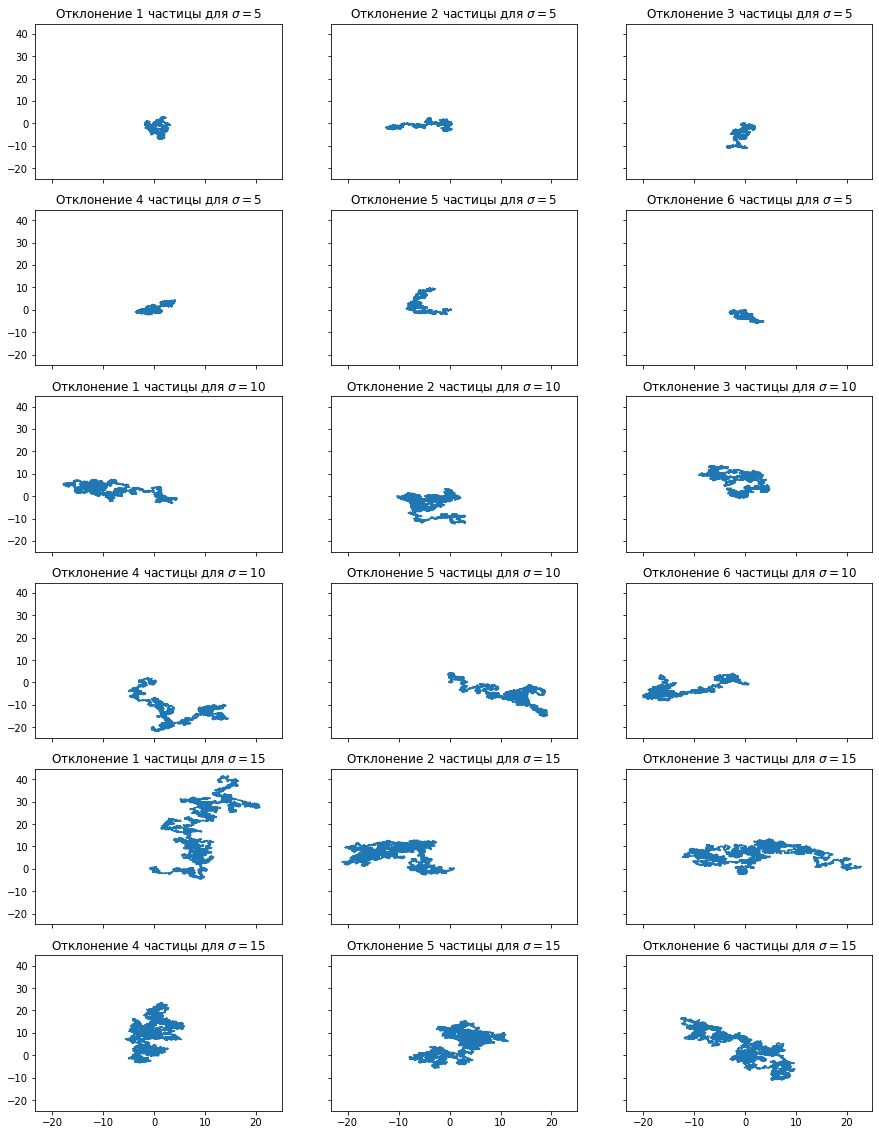

In [220]:
sigmas = [5,10,15]
fig, axes = plt.subplots(nrows = 6, ncols = 3, sharex=True, sharey=True, figsize = (15,20))
x = 0
y = 0

for sigma in sigmas:
    temp = trajectory(sigma = sigma, T = 1, n_t = 10000, dimension = 2, numbers_of_particles = 6)
    for i in range(6):
        axes[x, y].plot(temp[:,0][i], temp[:,1][i])
        axes[x, y].set_title('Отклонение {} частицы для $\sigma = {}$'.format(i + 1, sigma))
        y += 1
        if(y%3 == 0):
            y = 0
            x += 1
            continue
plt.show()

Как вид траектории зависит от $\sigma$?

# Ответ:
Чем больше $\sigma,$ тем больше график отходит от центра, что впринципе логично, ведь $\sigma$ отвечает за отклонение от среднего.

Сгенерируйте траекторию в трехмерном пространстве и постройте для нее 3D-график.

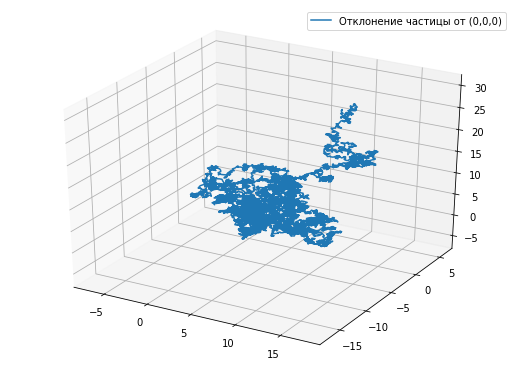

In [223]:
temp = trajectory(sigma = 5, T = 10, n_t = 10000, dimension = 3, numbers_of_particles = 1)

ax = Axes3D(plt.figure(figsize = (7,5)))
ax.plot(temp[0,0,:], temp[0,1,:], temp[0,2,:], label = 'Отклонение частицы от (0,0,0)')

plt.legend()
plt.show()

**3.** Исследуйте, как зависит среднее расстояние частицы до начала координат от времени и от параметра $\sigma$. Проведите исследование для разных размерностей пространства. Под средним в теории понимается математическое ожидание. На практике нужно исследовать его оценку посредством генерации множества траекторий.

В исследовании обязательно дожны присутствовать текстовые пояснения и графики. Сделайте выводы.

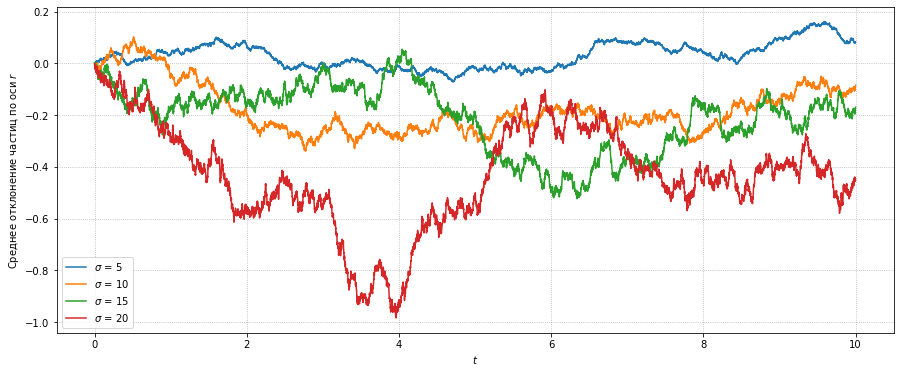

In [230]:
#одномерный случай
sigmas = [5, 10, 15, 20]
T = 10
n_t = 10000
x = np.linspace(0, T, num = n_t)

plt.figure(figsize = (15,6))

for sigma in sigmas:
    temp = trajectory(sigma = sigma, T = T, n_t = n_t, dimension = 1, numbers_of_particles = 10000)
    plt.plot(x, temp.mean(axis = 0)[0], label = '$\sigma$ = {}'.format(sigma))

plt.xlabel('$t$')
plt.ylabel('Среднее отклонение частиц по оси $r$')
plt.grid(ls = ':')
plt.legend()
plt.show()

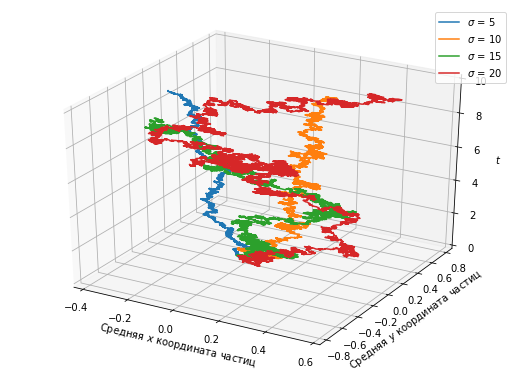

In [229]:
#двухмерный случай
sigmas = [5, 10, 15, 20]
T = 10
n_t = 10000
x = np.linspace(0, T, num = n_t)

ax = Axes3D(plt.figure(figsize = (7,5)))

for sigma in sigmas:
    temp = trajectory(sigma = sigma, T = T, n_t = n_t, dimension = 2, numbers_of_particles = 10000)
    temp = temp.mean(axis = 0)
    ax.plot(temp[0], temp[1], x, label = '$\sigma$ = {}'.format(sigma))

ax.set_xlabel('Средняя $x$ координата частиц')
ax.set_ylabel('Средняя $y$ координата частиц')
ax.set_zlabel('$t$')
plt.legend()
plt.show()

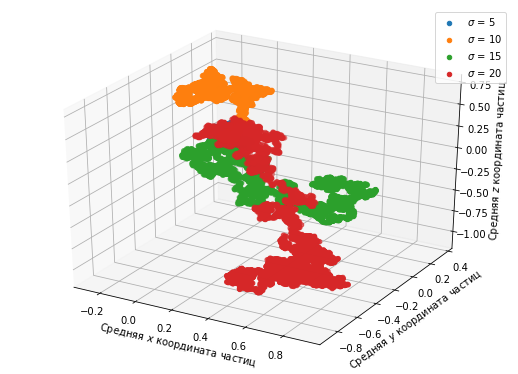

In [252]:
#трехмерный случай
sigmas = [5, 10, 15, 20]
T = 10
n_t = 10000
x = np.linspace(0, T, num = n_t)

ax = Axes3D(plt.figure(figsize = (7,5)))

for sigma in sigmas:
    temp = trajectory(sigma = sigma, T = T, n_t = n_t, dimension = 3, numbers_of_particles = 10000)
    temp = temp.mean(axis = 0)
    ax.scatter(temp[0], temp[1], temp[2], label = '$\sigma$ = {}'.format(sigma))

ax.set_xlabel('Средняя $x$ координата частиц')
ax.set_ylabel('Средняя $y$ координата частиц')
ax.set_zlabel('Средняя $z$ координата частиц')
plt.legend()
plt.show()

# Вывод:
Видно, что с увеличением времени координата частиц, конечно, может уйти куда далеко, но в основном колеблется около начального положения, так как вероятность пойти "*направо или налево*" одинакова. Что касается $\sigma,$ то понятно вывод примерно такой как прошлый, чем оно больше, тем больше вероятность на "*большее*" отклонение.

**P.S.** К сожалению, не придумал до конца, как строить зависимость, когда $dimension = 3,$ ибо там уже надо строить 4-ех мерный график, а я такое даже представить не могу. Либо вариант который я написал выше "*усредненная*" траекторию частиц в трехмерном пространстве с разными цветами для разных $\sigma,$ но реализавал не до конца, потому что так и не нашел, как работать с градиентной прозрачностью(чем больше времени прошло, тем меньше прозрачность). Для больших размерностей, думаю и говорить не стоит :)

### <font color="orange"><i>Сложная часть: визуализация распределений</i></font>

### Задача 4

В этой задаче вам нужно исследовать свойства дискретных распределений и абсолютно непрерывных распределений.

Для перечисленных ниже распределений нужно  
1. На основе графиков дискретной плотности (функции массы) для различных параметров пояснить, за что отвечает каждый параметр.  
2. Сгенерировать набор независимых случайных величин из этого распределения и построить по ним гистограмму.  
3. Сделать выводы о свойтсвах параметров каждого из распределений.

Распределения:
* Бернулли 
* Биномиальное
* Дискретное равномерное
* Геометрическое

Для выполнения данного задания можно использовать код с лекции. Можно использовать функции из `scipy`. Сделать виджеты недостаточно, поскольку они не сохраняются.

## Распределение Бернулли

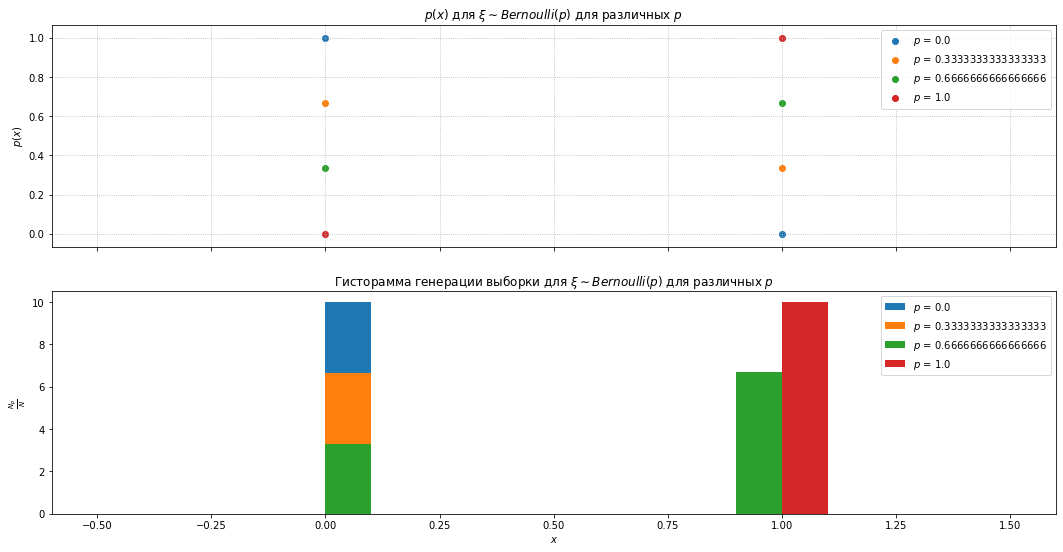

In [411]:
x = np.arange(0, 2)
probabilities = np.linspace(0, 1, 4)

fig, (ax1, ax2) = plt.subplots(2, 1,figsize = (18,9),sharex=True)

for p in probabilities:
    ax1.scatter(x, sps.bernoulli(p).pmf(x), label = '$p$ = {}'.format(p))
    ax2.hist(sps.bernoulli(p).rvs(size = 10000), density=True, label = '$p$ = {}'.format(p))

ax1.set_title(r'$p(x)$ для $\xi \sim Bernoulli(p)$ для различных $p$')
ax1.set_ylabel('$p(x)$')
ax1.grid(ls = ':')
ax1.legend()

ax2.set_title(r'Гисторамма генерации выборки для $\xi \sim Bernoulli(p)$ для различных $p$')
ax2.set_xlabel('$x$')
ax2.set_ylabel(r'$\frac{N_p}{N}$')
ax2.legend()
plt.show()


## Биномиальное распределение

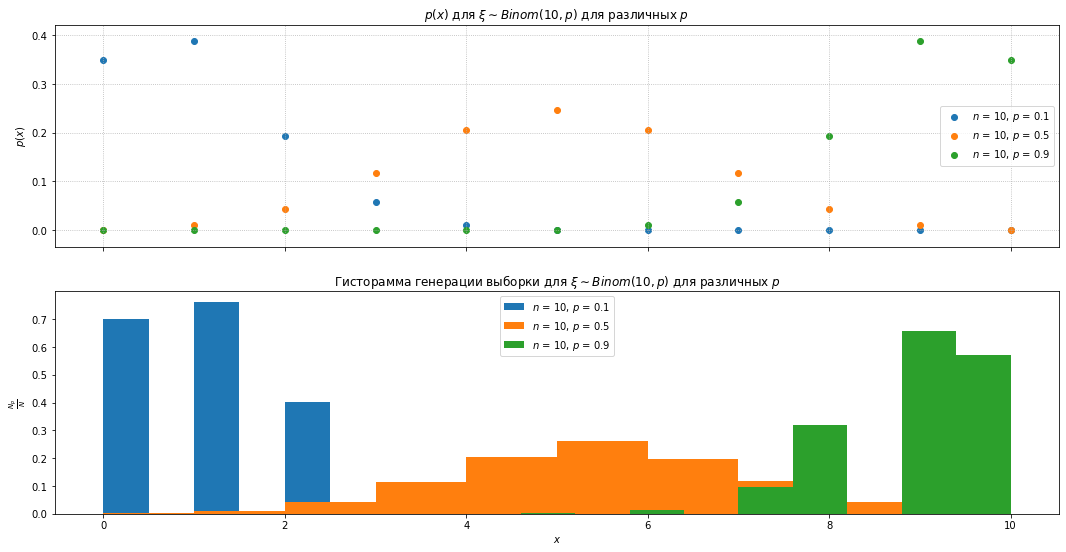

In [432]:
x = np.arange(0, 11)

probabilities = np.linspace(0.1, 0.9, 3)

fig, (ax1, ax2) = plt.subplots(2, 1,figsize = (18,9),sharex=True)

for p in probabilities:
    ax1.scatter(x, sps.binom(10, p).pmf(x), label = '$n$ = {}, $p$ = {}'.format(10, p))
    ax2.hist(sps.binom(10, p).rvs(size = 10000), density=True, label = '$n$ = {}, $p$ = {}'.format(10, p))

ax1.set_title(r'$p(x)$ для $\xi \sim Binom(10, p)$ для различных $p$')
ax1.set_ylabel('$p(x)$')
ax1.grid(ls = ':')
ax1.legend()

ax2.set_title(r'Гисторамма генерации выборки для $\xi \sim Binom(10, p)$ для различных $p$')
ax2.set_xlabel('$x$')
ax2.set_ylabel(r'$\frac{N_p}{N}$')
ax2.legend()
plt.show()


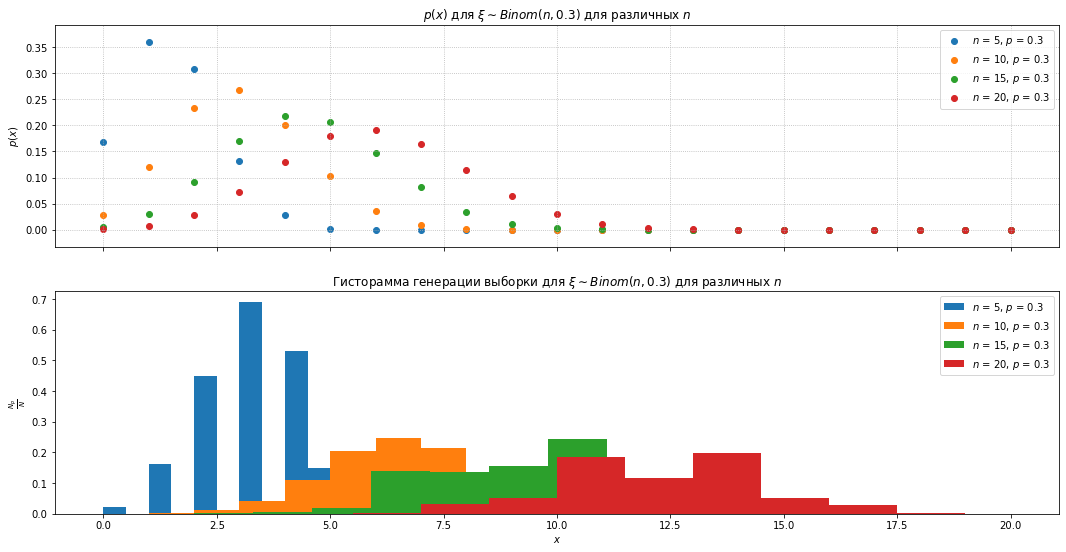

In [435]:
x = np.arange(0, 21)

numbers = [5, 10, 15, 20]

fig, (ax1, ax2) = plt.subplots(2, 1,figsize = (18,9),sharex=True)

for n in numbers:
    ax1.scatter(x, sps.binom(n, 0.3).pmf(x), label = '$n$ = {}, $p$ = {}'.format(n, 0.3))
    ax2.hist(sps.binom(n, 0.6).rvs(size = 10000), density=True, label = '$n$ = {}, $p$ = {}'.format(n, 0.3))

ax1.set_title(r'$p(x)$ для $\xi \sim Binom(n, 0.3)$ для различных $n$')
ax1.set_ylabel('$p(x)$')
ax1.grid(ls = ':')
ax1.legend()

ax2.set_title(r'Гисторамма генерации выборки для $\xi \sim Binom(n, 0.3)$ для различных $n$')
ax2.set_xlabel('$x$')
ax2.set_ylabel(r'$\frac{N_p}{N}$')
ax2.legend()
plt.show()


## Дискретное равномерное распределение

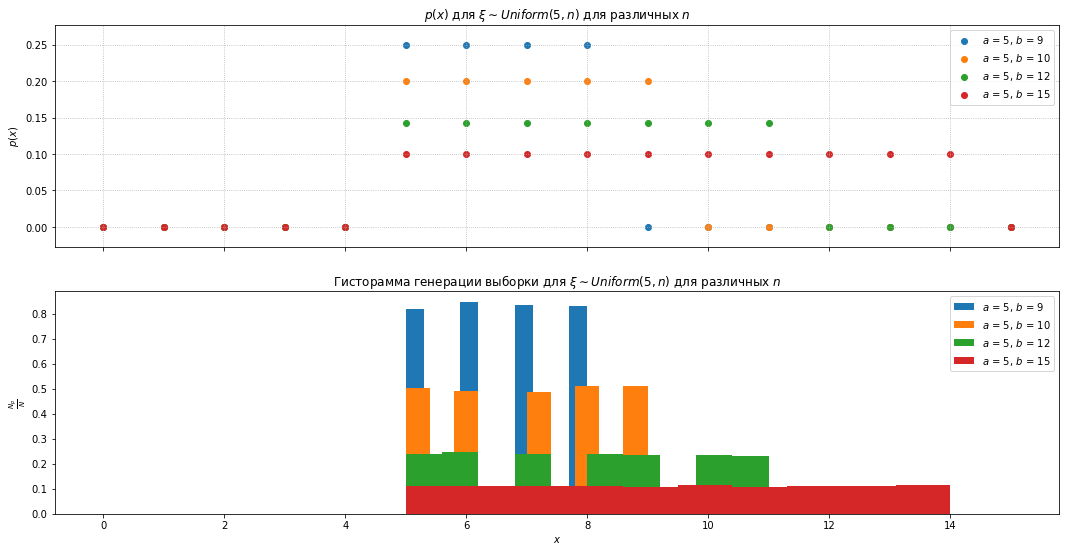

In [428]:
x = np.arange(0, 16)

numbers = [9, 10, 12, 15]

fig, (ax1, ax2) = plt.subplots(2, 1,figsize = (18,9),sharex=True)

for n in numbers:
    ax1.scatter(x, sps.randint(5, n).pmf(x), label = '$a$ = {}, $b$ = {}'.format(5, n))
    ax2.hist(sps.randint(5, n).rvs(size = 10000), density=True, label = '$a$ = {}, $b$ = {}'.format(5, n))

ax1.set_title(r'$p(x)$ для $\xi \sim Uniform(5, n)$ для различных $n$')
ax1.set_ylabel('$p(x)$')
ax1.grid(ls = ':')
ax1.legend()

ax2.set_title(r'Гисторамма генерации выборки для $\xi \sim Uniform(5, n)$ для различных $n$')
ax2.set_xlabel('$x$')
ax2.set_ylabel(r'$\frac{N_p}{N}$')
ax2.legend()
plt.show()


##  Геометрическое распределение

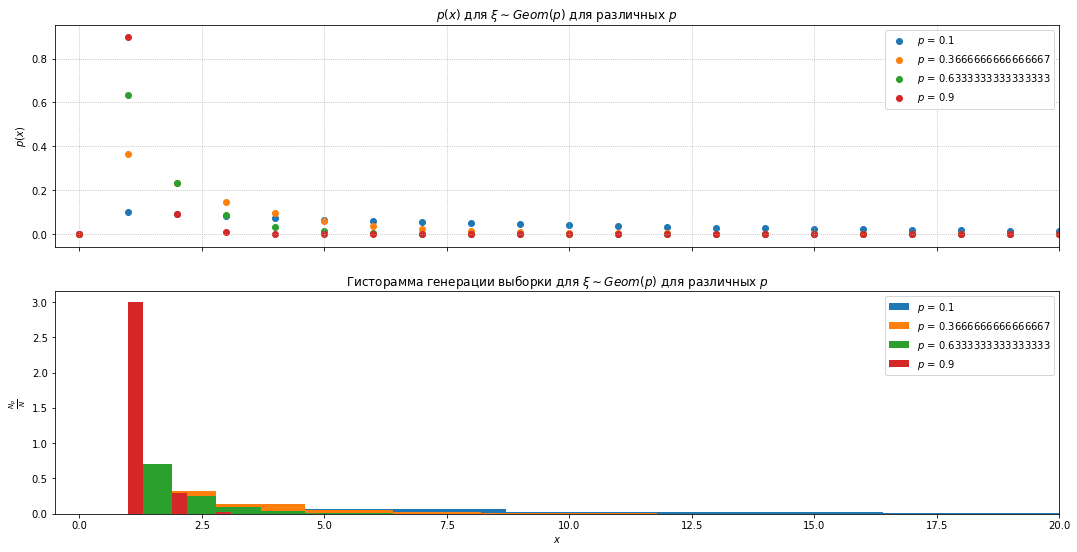

In [429]:
x = np.arange(0, 21)
probabilities = np.linspace(0.1, 0.9, 4)

fig, (ax1, ax2) = plt.subplots(2, 1,figsize = (18,9),sharex=True)

for p in probabilities:
    ax1.scatter(x, sps.geom(p).pmf(x), label = '$p$ = {}'.format(p))
    ax2.hist(sps.geom(p).rvs(size = 10000), density=True, label = '$p$ = {}'.format(p))

ax1.set_title(r'$p(x)$ для $\xi \sim Geom(p)$ для различных $p$')
ax1.set_ylabel('$p(x)$')
ax1.grid(ls = ':')
ax1.legend()

ax2.set_title(r'Гисторамма генерации выборки для $\xi \sim Geom(p)$ для различных $p$')
ax2.set_xlabel('$x$')
ax2.set_ylabel(r'$\frac{N_p}{N}$')
ax2.legend()
plt.xlim(-0.5, 20)
plt.show()


## Вывод:

### Распределение Бернулли

Здесь все крайне понятно, с ростом $p$ увлеичивается шанс выпадения 1

### Биномиальное распределение

Самое интересное на мой взгляд. Здесь два случая:

* Увеличение $p$ при фиксированном $n$

Видно, что высота горба от 0 до 0.5, и от 1 до 0.5 уменьшается, а ширина растет. Это в свое очерель значит, что чем ближе $p$ к 0.5, тем больше у нас разброс

* Увеличение $n$ при фиксированном $p$

При увеличении $n$ высота горбов уменьшается, а ширина растет. Чем больше $n$, тем больше разброс.

### Дискретное равномерное распределение

При увеличении интервала --- уменьшается высота прямоугольника и увеличивается ширина. Что логично, ведь мы добавляем новые значение в наше множество возможных значений. Разброс растет.

### Геометрическое распределение

При уменьшении $p$ уменьшается высота столба около нуля, зато увеличивается её ширина, впринципе вывод очевиден, если вспомнить физическую интерпритацию геометрического распределения, как *первого успеха*.